# Cardiovascular Heart disease


Class: Pstat 131

By: Arthur C. Thach , 5136775

Instructor: Professor Guo, Yu

Ta: Hanmo, li

The goal of this probability and statistics project is to predict (using python) whether an individaul suffers from cardiovascular heart disease and establish what the main risk factors and predictors for cardiovascular heart disease are. 

# Contents:
    

    1. Setup
    
    2. Data preprocessing and Analysis
       a. Outlier detection
       b. IQR based filtering ( Correlation between different predictors)
       c. BMI - filtering 
       d. Data insights, Feature engineering
       e. Standardization of data
       
    3. Machine learning models
       a. Creation of training/test splits
       b. Logisitic Regression (Feature selection, Tuned Logistic Regression) 
       c. Discriminant Analysis (linear and quadratic)
       d. Decision Tree (Basic/Tuned)
       e. Boosting Classifiers
       f. KNN (Basic)
       g. Random Forest
       h. SVC 
       
    4. Comparisons of ML model and Conclusion 
    
    5. References

# 1. Setup

    
    A) Below we have the libraries and functions needed to run our code and algorthims properly. # Many of these libraries are already built into other languages like R (which is the main language used in class but I perfered to use Python as I wanted to improve my python technical skills) 
    B) Reading the raw data set: 
        Pre-analysis of data is essential before data preprocessing to gain a comprehensive understanding of the dataset's characteristics, distribution, and potential challenges, enabling informed decisions during preprocessing to address specific issues and optimize the overall performance of machine learning algorithms.
    

In [1]:
#A
#basic data handling and utility.
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import math
import string
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import warnings

#sklearn preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf


#sklearn logistic regression and split creation
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

#sklearn LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#sklearn QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector


#sklearn random forest
from sklearn.ensemble import RandomForestClassifier

#sklearn KNN
from sklearn.neighbors import KNeighborsClassifier

#sklearn SVM
from sklearn import svm
from sklearn.svm import LinearSVC

# Seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#B
cardio = pd.read_csv("/Users/Acthach/Desktop/Pstat131/cardio_train.csv",delimiter=";")

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


The dataset we are using today (cardio_train.csv) is a public dataset recieved from kaggle.com consisting of 70000 records of patient data with 12 features and target variables. 

The features from this dataset include three different types of data:
    (Objective: factual information, examination: results of medical examination, and subjective: information given by the patient.)

    Age | Objective Feature | age | int (days)

    Height | Objective Feature | height | int (cm) 

    Weight | Objective Feature | weight | float (kg) 

    Gender | Objective Feature | gender | categorical code 

    Systolic blood pressure | Examination Feature | ap_hi | int 

    Diastolic blood pressure | Examination Feature | ap_lo | int 

    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal 

    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal 

    Smoking | Subjective Feature | smoke | binary 

    Alcohol intake | Subjective Feature | alco | binary 

    Physical activity | Subjective Feature | active | binary 

    Presence or absence of cardiovascular disease | Target Variable | cardio | binary 



In [3]:
num_entries = cardio.shape[0]*cardio.shape[1]
print('Number of entries in the dataframe: ', num_entries)

num_missing_values = cardio.isna().sum().sum()
print('Missing values: ', num_missing_values, '\n')

cardio_dup = cardio.duplicated().sum()
if cardio_dup:
    print('Duplicates Rows in Dataset are : {}'.format(cardio_dup))
else:
    print('Dataset contains no Duplicate Values')

Number of entries in the dataframe:  910000
Missing values:  0 

Dataset contains no Duplicate Values


In [4]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From the results of the above code we are able to initally conclude that there are no missing data entries and hence no data type problems. 
But after further observation of our data the describe function  (similar to our summary function in r)gives us some deeper understandings within the context of our data and allows us to make observations data to understand the data better.

1) The first I noticed within the context of our Dataset is that age is calcualted through the days alive which is unrealistic when you look at the minimum value for age (10798.0) produced by our describe funciton which makes me think that there are numbers in age that repersent missing or incorrect values. 

2) The second observation is that Weight also has strange numbers as both the min and max weight produce strange numbers in the context of our data. the minimum weight 10kg is roughly 22 pound which is an impossible number in the context of our situation. 

3)  Systolic blood pressure "ap_hi" and Diastolic blood pressure "ap_lo" cannot be negative. As Systolic blood pressure is the time of heartbeats and Diastolic blood pressure is the time of heart rests between beats which cannot be negative or the user would be dead. 

4) According to the American Heart assosciation if the data from ap_hi and ap_lo are greater than 180/120 respectively then they are suffering from a hypertensive crisis which means the maximum values for ap_hi(16020) and ap_lo(11000.0000) are definetly incorrect. Furthermore below this cell is a reference from the American Heart assosciation indicating what "healthy levels of these predictors are"

I will attempt to fix these issues in the preprcoessing of our data.

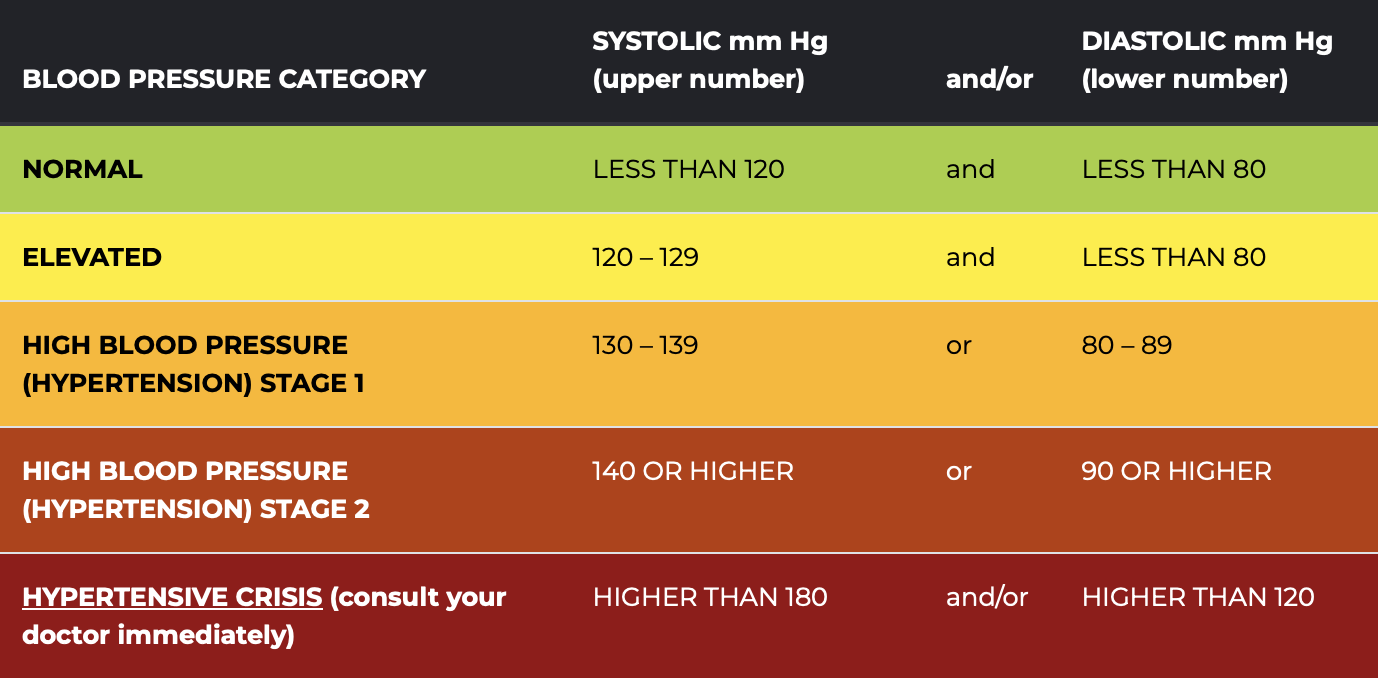

# 2. Data preprocessing and continued Data Analysis
    Data processing is crucial in machine learning algorithms because it enables the extraction of meaningful patterns and relationships from raw data, enhancing the algorithm's ability to understand and learn from the information provided. Through preprocessing, tasks such as cleaning, normalization, and feature engineering refine the dataset, making it more conducive for algorithmic analysis. This not only improves the accuracy and efficiency of machine learning models but also facilitates the convergence of algorithms by reducing noise and irrelevant information leading to more effective and predictions.

In [5]:
cardio['age'] = cardio['age'].apply(lambda x: x/365)  
#by dividing the number of days by 365 (days in a year) we can change our data to be listed in years.

In [6]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


# 2a Outlier detection
Before we look for what to consider an outlier we must remove "bad data". bad data may change what an outlier is considered within the context of our data but is necessary as these points are impossible to have.

In [7]:
#quick outlier deteciton function using 1.5x IQR rule
def detect_outliers(df,q1,q3):
  for col in df.columns:
    df_feature = df[col]
    Q1 = df_feature.quantile(q1) # 25th percentile of the data of the given feature
    Q3 = df_feature.quantile(q3)  # 75th percentile of the data of the given feature
    IQR = Q3 - Q1    #IQR is interquartile range. 
    print(f'Feature: {col}-------------')
    print(f'Percentiles: {int(q1*100)}th={Q1}, {int(q3*100)}th={Q3}, IQR={IQR}')
    # calculate the outlier lower and upper bound
    lower, upper = Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)
    # identify outliers
    outliers = [x for x in df_feature if x < lower or x > upper]
    print('Identified outliers: %d \n' % len(outliers))

As mentioned above there are certain points which we can consider impossible in the context of our dataset. This implies a possible error in input of the data so we will remove these to improve the quality of our outlier detection data. 

We will start with the analysis of our Systolic and Diastolic values.

In [8]:
cardio = cardio[ (cardio['ap_lo'] >= 0) & (cardio['ap_hi'] >= 0) ]  #remove negative values
cardio = cardio[ (cardio['ap_lo'] <= 220) & (cardio['ap_hi'] <= 280) ]  #remove impossible data points
cardio = cardio[ (cardio['ap_lo'] < cardio['ap_hi']) ]  #remove systolic higher than diastolic

In [9]:
detect_outliers(cardio[['ap_hi', 'ap_lo']],0.05,0.95)

Feature: ap_hi-------------
Percentiles: 5th=100.0, 95th=160.0, IQR=60.0
Identified outliers: 0 

Feature: ap_lo-------------
Percentiles: 5th=70.0, 95th=100.0, IQR=30.0
Identified outliers: 52 



Next we will be filtering out weight and height. The smallest and tallest human ever known were 54 cm and 251 cm respectively so we must check to see if there are any recorded data that are impossible before we calculate our outliers.

In [10]:
len(cardio[(cardio['height'] > 251) | (cardio['height'] < 54)])

0

In [11]:
detect_outliers(cardio[['height', 'weight']],0.05,0.95)

Feature: height-------------
Percentiles: 5th=152.0, 95th=178.0, IQR=26.0
Identified outliers: 47 

Feature: weight-------------
Percentiles: 5th=55.0, 95th=100.0, IQR=45.0
Identified outliers: 20 



# 2b IQR based filtering
For this part I choose to remove only height and weight as these predictors can have natural variability within a population so its more likely that extreme outliers in this case may be casued by data entry mistakes or measurement errors but with a predictor like ap_hi or ap_lo could be clinically significant and if we remove these values they may result in a loss of important medical information. 

In [12]:
cardio_cleaned = cardio 
for col in ['height','weight']:
  Q1 = cardio[col].quantile(0.05) # 5th percentile of the data of the given feature
  Q3 = cardio[col].quantile(0.95)  # 95th percentile of the data of the given feature
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  cardio_cleaned = cardio_cleaned[(cardio_cleaned[col] >= lower) & (cardio_cleaned[col] <= upper)]
cardio_cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000
mean,49972.820286,53.328641,1.348578,164.407419,74.083221,126.668288,81.256747,1.364686,1.225724,0.087942,0.053321,0.803347,0.494662
std,28842.728746,6.761682,0.476523,7.919721,14.210651,16.716935,9.635478,0.678908,0.571566,0.283212,0.224675,0.397471,0.499975
min,0.000000,29.583562,1.000000,113.000000,11.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25004.500000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50012.000000,53.978082,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74860.500000,58.424658,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,207.000000,167.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Dataset after cleaning
print(f'Number of rows of cardio dataset after data preprocessing: {len(cardio_cleaned)}')
print(f'How much percent missing: {round((70000-len(cardio_cleaned))/70000*100,2)}%')

Number of rows of cardio dataset after data preprocessing: 68659
How much percent missing: 1.92%


# 2c BMI
According to the National Library of Medicine "patients with increased BMI numbers are at a higher risk for metabolic syndrome. It represents a constellation of metabolic abnormalities that co-occur in an individual, which will confer an increased risk of cardiovascular disease (CVD) and diabetes mellitus type II (T2DM)." 

By creating this new predictor BMI (Body Mass Index) with height and weight. It might lead us to get better insights within our algorthims.
To calcualte it we have a formula:
BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared


In [14]:
cardio_cleaned['BMI'] = round(cardio_cleaned['weight']/((cardio_cleaned['height']/100)**2),1)
cardio_cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000,68659.000000
mean,49972.820286,53.328641,1.348578,164.407419,74.083221,126.668288,81.256747,1.364686,1.225724,0.087942,0.053321,0.803347,0.494662,27.448254
std,28842.728746,6.761682,0.476523,7.919721,14.210651,16.716935,9.635478,0.678908,0.571566,0.283212,0.224675,0.397471,0.499975,5.243849
min,0.000000,29.583562,1.000000,113.000000,11.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,25004.500000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.900000
50%,50012.000000,53.978082,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.300000
75%,74860.500000,58.424658,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.100000
max,99999.000000,64.967123,2.000000,207.000000,167.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,108.200000


# 2d Further data insights and Feature Engineering

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

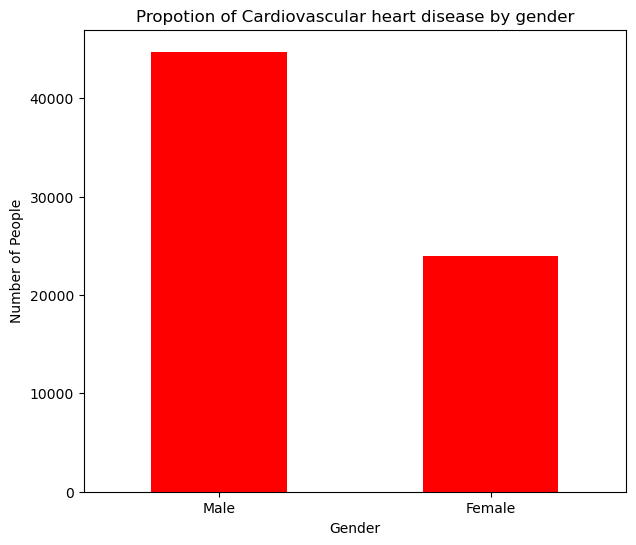

In [15]:
#Distribution of cardiovascular heart disease by gender
gender = cardio_cleaned['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="r")
ax.set_title("Propotion of Cardiovascular heart disease by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

 It can be seen that the probability of disease is higher when the gender is male.

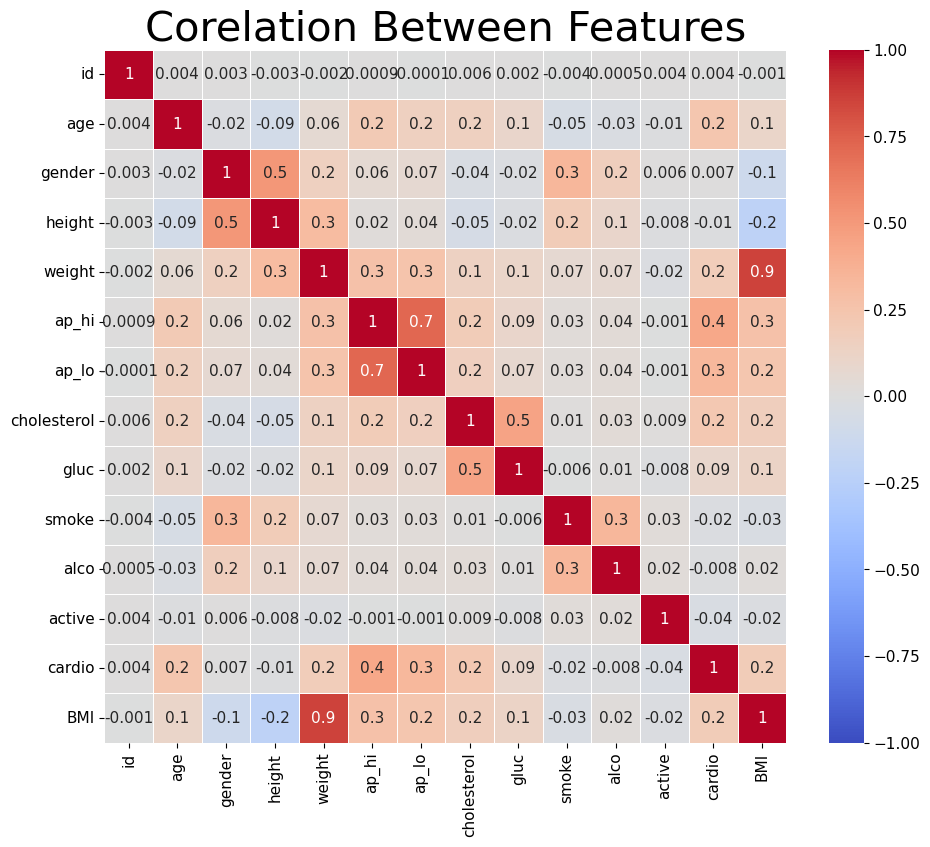

In [16]:
#plotting correlation map
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cardio_cleaned.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

The heatmap above gives the basis for understanding how the health factors in the dataset are correlated with one another. High correlation within independent features means both represent same information. So when we drop one of the feature we won't lose much quality data

Observations:
1) age and cholesterol have significant impact, but not very high correlated with the cardiovascular predictor.
2) ap_hi has the highest correlation with the cardio value, so it may have significant impact to our model. also same with ap_lo
3) Newly formed feature 'BMI' doesn't have the best correlation with the target and it highly correlated with "weight" so within these two values we may be overfitting.
4) 'alco', 'smoke' and 'height', are the least correlated features with target
5) As a patient’s age increases, their resting blood pressure tends to increase and their maximum heart rate achieved tends to decrease. The correlation between age and cardio is positive, however it is not a very strong correlation with a value of 0.2.

# 2e: Standardization of data
We have multiple features with different scales within our project. Here we will use Standartscaler library to transform the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data in order to fit each model easily.

In [17]:
cardio_scaled=cardio_cleaned.copy()

columns_to_scale = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','height', 'BMI']

scaler = StandardScaler()
cardio_scaled[columns_to_scale] = scaler.fit_transform(cardio_cleaned[columns_to_scale])

cardio_scaled.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,-0.434342,1.367041,0.453628,-0.850300,-0.997097,-0.130430,-0.537170,1,0,0,1,0,-1.038988
1,1,0.309176,-0.731507,-1.061588,0.768217,0.797503,0.907409,2.408757,1,0,0,1,1,1.421055
2,2,-0.246335,-0.731507,0.074824,-0.709559,0.199303,-1.168269,2.408757,1,0,0,0,1,-0.752936
3,3,-0.746336,1.367041,0.579896,0.557106,1.395703,1.945247,-0.537170,1,0,0,1,1,0.238709
4,4,-0.806709,-0.731507,-1.061588,-1.272521,-1.595297,-2.206108,-0.537170,1,0,0,0,0,-0.848287


# 3: Machine Learning models
In this section we will be using the Machine Learning models we learned in class to predict whether the patient has CVD based on its predictors. 

For the purpose of this project we will be using the most common training test split ratio 80:20 meaning That means 80% of the dataset goes into the training set and 20% of the dataset goes into the testing set

# 3a - Training and Test sets

In [18]:
X = cardio_cleaned.drop(['cardio'], axis=1) #features 
y = cardio_cleaned['cardio']  #target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)


#Train-test-split for scaled data
X_scaled = cardio_scaled.drop(['cardio'], axis=1) #features 
y_scaled = cardio_scaled['cardio']  #target feature


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (54927, 13)
X_test shape is  (13732, 13)
y_train shape is  (54927,)
y_test shape is  (13732,)


# 3b: Logistic regression - (Feature selection, Tuned Logistic Regression)

The accuracy score is: 0.7083454704340227
Sensitivity (TPR) = 0.7072665384046174

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6975
           1       0.70      0.71      0.70      6757

    accuracy                           0.71     13732
   macro avg       0.71      0.71      0.71     13732
weighted avg       0.71      0.71      0.71     13732



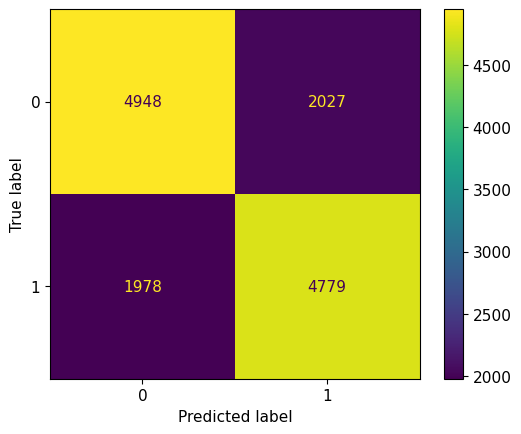

In [19]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation: Confusion matrix#
###############################
logreg_acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_logreg = cm[1][1] /(cm[1][0] + cm[1][1])

print('The accuracy score is:', logreg_acc) # accuracy score
print('Sensitivity (TPR) =', tpr_logreg) 

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

ConfusionMatrixDisplay.from_estimator(logreg,X_test, y_test)
plt.show()

In [20]:
sfs = SequentialFeatureSelector(LogisticRegression(solver='lbfgs', max_iter=100000),
          direction='forward',
          scoring = 'accuracy',
          cv = 5,
          n_jobs=-1)
sfs.fit(X_train, y_train)
print("Features selected by forward sequential selection: " f"{sfs.get_feature_names_out()}")

Features selected by forward sequential selection: ['age' 'ap_hi' 'ap_lo' 'cholesterol' 'alco' 'BMI']


The accuracy score is: 0.7232741042819691
Sensitivity (TPR) = 0.6570963445315968

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6975
           1       0.75      0.66      0.70      6757

    accuracy                           0.72     13732
   macro avg       0.73      0.72      0.72     13732
weighted avg       0.73      0.72      0.72     13732



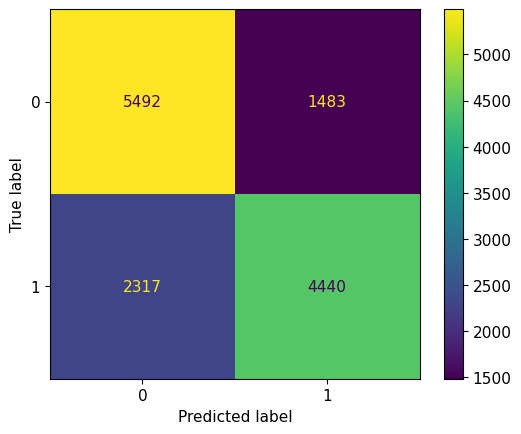

In [21]:
#train the model after subset selection with selected features
X_train_subset = X_train[sfs.get_feature_names_out()]
X_test_subset = X_test[sfs.get_feature_names_out()]

logreg_subset = LogisticRegression()
logreg_subset.fit(X_train_subset, y_train)
y_pred = logreg_subset.predict(X_test_subset)

# Evaluation: Confusion matrix#
###############################
logreg_acc_subset = accuracy_score(y_test, y_pred)
cm_subset = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_logreg_subset = cm_subset[1][1] /(cm_subset[1][0] + cm_subset[1][1])

print('The accuracy score is:', logreg_acc_subset) # accuracy score
print('Sensitivity (TPR) =', tpr_logreg_subset)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

ConfusionMatrixDisplay.from_estimator(logreg_subset, X_test_subset, y_test)
plt.show()

# 3c: Discriminant Analysis
Linear Discriminant Analysis with default parameters. 
Quadratic Discriminant Analysis

Accuracy = 0.7229099912612875
Sensitivity (TPR) = 0.6570963445315968

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6975
           1       0.75      0.65      0.70      6757

    accuracy                           0.72     13732
   macro avg       0.73      0.72      0.72     13732
weighted avg       0.73      0.72      0.72     13732



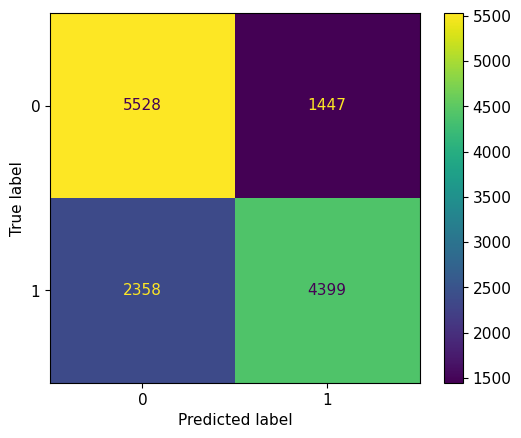

In [22]:
#Linear 
lda = LinearDiscriminantAnalysis(solver='lsqr', store_covariance=True)
lda.fit(X_train, y_train)
# Predict Test Set Responses #
##############################
y_predicted = lda.predict(X_test)
# convert the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Evaluation: Confusion matrix #
###############################
lda_acc = accuracy_score(y_test, y_predicted)  # accuracy score
cm_lda = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_lda = cm_lda[1][1] /(cm_lda[1][0] + cm_lda[1][1])

print('Accuracy =', lda_acc)  
print('Sensitivity (TPR) =', tpr_lda)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_predicted ))

ConfusionMatrixDisplay.from_estimator(lda, X_test, y_test)
plt.show()

Accuracy = 0.687518205651034
Sensitivity (TPR) = 0.5620837649844606

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.66      0.81      0.72      6975
           1       0.74      0.56      0.64      6757

    accuracy                           0.69     13732
   macro avg       0.70      0.69      0.68     13732
weighted avg       0.70      0.69      0.68     13732



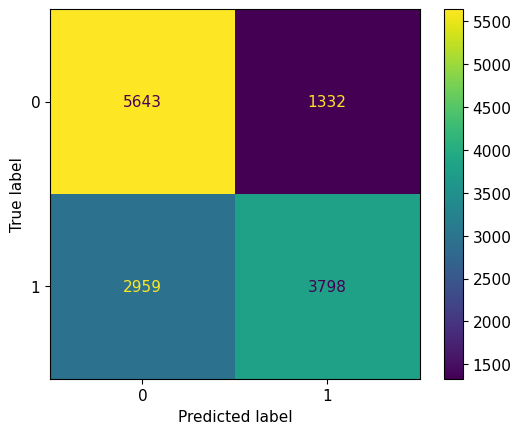

In [23]:
#Quadratic Discriminant Analysis
qdaClassifier = QuadraticDiscriminantAnalysis(store_covariance=True)
qdaClassifier.fit(X_train,y_train)
#get predictions
y_predict = qdaClassifier.predict(X_test)
y_predicted= np.array(y_predict > 0.5, dtype=float)
#get evaluation criteria
qda_acc = accuracy_score(y_test, y_predicted) 
qda_cm = confusion_matrix(y_test, y_predicted)
qda_tpr = qda_cm[1][1] /(qda_cm[1][0] + qda_cm[1][1])
print('Accuracy =', qda_acc)
print('Sensitivity (TPR) =', qda_tpr)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_predicted ))

ConfusionMatrixDisplay.from_estimator(qdaClassifier, X_test, y_test)
plt.show()

# 3d: Decision Tree (Basic/Tuned)

Accuracy: 0.6337023011942907
Sensitivity (TPR) = 0.6313452715702235

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6975
           1       0.63      0.63      0.63      6757

    accuracy                           0.63     13732
   macro avg       0.63      0.63      0.63     13732
weighted avg       0.63      0.63      0.63     13732



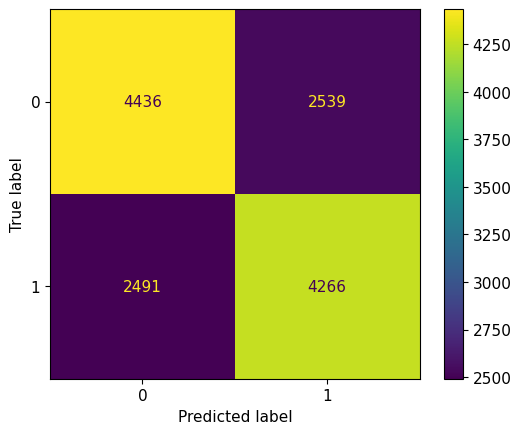

In [24]:
#basic Decision Tree
# min_samples_split: The minimum number of samples required to split an internal node
dtree = DecisionTreeClassifier()

# Build classification tree
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

# Evaluation: Confusion matrix #
################################
dtree_acc = accuracy_score(y_test, y_pred)   # accuracy score
cm_dtree = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_dtree = cm_dtree[1][1] /(cm_dtree[1][0] + cm_dtree[1][1])

print("Accuracy:",dtree_acc)
print('Sensitivity (TPR) =', tpr_dtree)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)
plt.show()

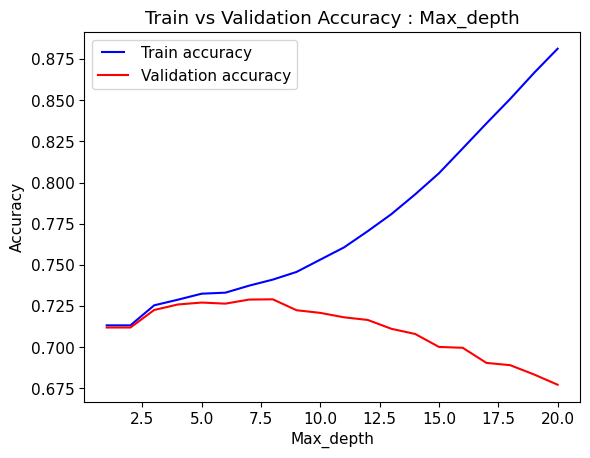

In [25]:
#Hyperparameter tuning for max_depth
train_acc1 = []
val_acc1 = []

for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  train_acc1.append(model.score(X_train, y_train))
  val_acc1.append(model.score(X_test,y_test))

line1, = plt.plot([*range(1,21)], train_acc1, 'b', label='Train accuracy')
line2, = plt.plot([*range(1,21)], val_acc1, 'r', label='Validation accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_depth')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.show()

train_acc1.clear()
val_acc1.clear()

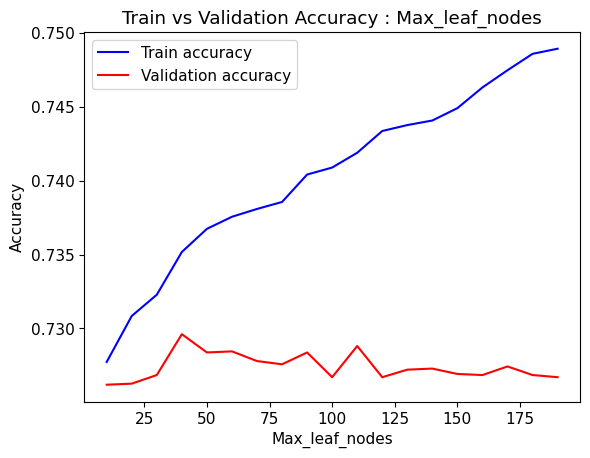

In [26]:
#Hyperparameter tuning for max_leaf_nodes
train_acc2 = []
val_acc2 = []

for max_ln in range(10,200,10):
  model2 = DecisionTreeClassifier(max_leaf_nodes=max_ln, random_state=42)
  model2.fit(X_train, y_train)
  train_acc2.append(model2.score(X_train, y_train))
  val_acc2.append(model2.score(X_test,y_test))


line3, = plt.plot([*range(10,200,10)], train_acc2, 'b', label='Train accuracy')
line4, = plt.plot([*range(10,200,10)], val_acc2, 'r', label='Validation accuracy')

plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_leaf_nodes')
plt.ylabel('Accuracy')
plt.xlabel('Max_leaf_nodes')
plt.show()

train_acc2.clear()
val_acc2.clear()

From the two graphs above we can estimate that the validation and depth starts depricating around 40 and 8 respectively hence when making out tuned Decision Tree we should set the min number of samples to split the node as 40 and 8.

Accuracy: 0.7291727352170113
Sensitivity (TPR) = 0.6924670711854374

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6975
           1       0.74      0.69      0.72      6757

    accuracy                           0.73     13732
   macro avg       0.73      0.73      0.73     13732
weighted avg       0.73      0.73      0.73     13732



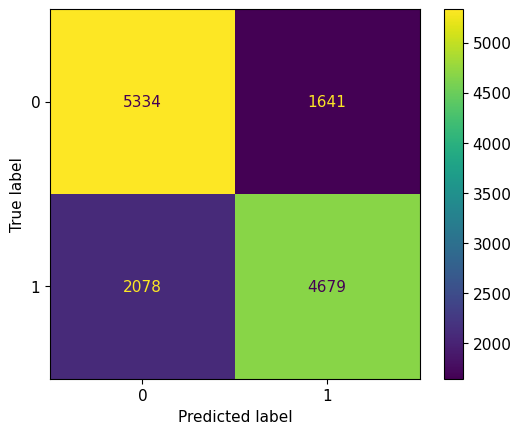

In [27]:
# min_samples_split: The minimum number of samples required to split an internal node
dtree_tuned = DecisionTreeClassifier(max_leaf_nodes=40,max_depth=8)

# Build classification tree
dtree_tuned.fit(X_train, y_train)

y_pred = dtree_tuned.predict(X_test)

# Evaluation: Confusion matrix #
################################
dtree_tuned_acc = accuracy_score(y_test, y_pred)   # accuracy score
cm_dtree_tuned = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_dree_tuned = cm_dtree_tuned[1][1] /(cm_dtree_tuned[1][0] + cm_dtree_tuned[1][1])

print("Accuracy:",dtree_tuned_acc)  
print('Sensitivity (TPR) =', tpr_dree_tuned)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

ConfusionMatrixDisplay.from_estimator(dtree_tuned, X_test, y_test)
plt.show()

# 3e - Gradient Boosting Classifier

Accuracy: 0.7335420914651908
Sensitivity (TPR) = 0.6846233535592718

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6975
           1       0.75      0.68      0.72      6757

    accuracy                           0.73     13732
   macro avg       0.74      0.73      0.73     13732
weighted avg       0.73      0.73      0.73     13732



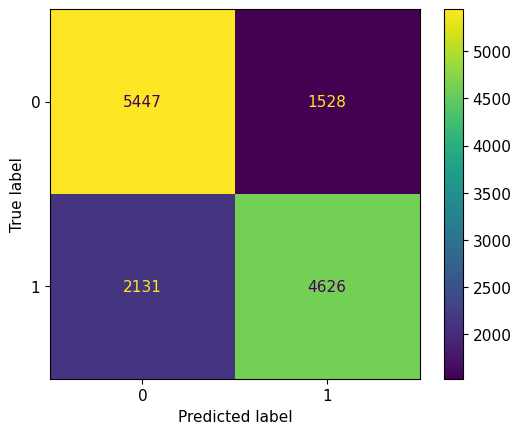

In [28]:
booster = GradientBoostingClassifier(max_depth=7,n_estimators=50,min_samples_split=1400,min_samples_leaf=60,max_features=7,subsample=0.85)
boost_est = booster.fit(X_train, y_train)

y_pred = boost_est.predict(X_test)

# Evaluation: Confusion matrix #
################################
boosting_acc = accuracy_score(y_test, y_pred) #accuracy score
cm_bossting = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_boost = cm_bossting[1][1] /(cm_bossting[1][0] + cm_bossting[1][1]) #Sensitivity (TPR)

print('Accuracy:', boosting_acc) # accuracy score
print('Sensitivity (TPR) =', tpr_boost)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

ConfusionMatrixDisplay.from_estimator(boost_est, X_test, y_test)
plt.show()

# 3f - K Nearest Neighbors
KNN is a widely used machine learning approach for classification tasks. An observation is classified by considering the K nearest neighbors and taking a majority vote

This is our basic model:
- Calculate some reference values for different values of K
- Using unscaled data
- Similar weighting of all features (unscaled data weights features in itself)
- Considering every feature
Values for K: 1, 5, 10, 20, 30, 40, 50

K-value that results in highest accuracy is used for further optimizing the model

In [35]:
# Creating classifiers for every value of K
classifiers = []
nb_neighbor = [1, 5, 10, 20, 30, 40, 50]
for i in range(len(nb_neighbor)):
    classifiers.append(KNeighborsClassifier(nb_neighbor[i]))

# Initializing the lists for accuracy, true positive rate and true negative rate
# Later used to compare the classifiers for different values of K
score_list = []
true_positive = []
true_negative = []

# Fitting the training dataset for every classifier and calculating metrics

index = 0
for clf in classifiers: 
    clf.fit(X_train,y_train)

    score = clf.score(X_test, y_test)    
    y_pred = clf.predict(X_test)
    
    print(f"Accuracy for K =", nb_neighbor[index] ,"nearest Neighbors: ",  accuracy_score(y_test, y_pred))

    
    cm = confusion_matrix(y_test, y_pred) # Confusion matrix  

    score_list.append(score)
    true_positive.append(cm[1][1])
    true_negative.append(cm[0][0])
    
    index = index + 1
    
    accuracy_KNN = 0.6422225458782406
    true_positive_KNN = cm[1][1]/sum(y_test)

Accuracy for K = 1 nearest Neighbors:  0.6063210020390329
Accuracy for K = 5 nearest Neighbors:  0.6387998834838334
Accuracy for K = 10 nearest Neighbors:  0.6422225458782406
Accuracy for K = 20 nearest Neighbors:  0.6352315758811535
Accuracy for K = 30 nearest Neighbors:  0.6189921351587533
Accuracy for K = 40 nearest Neighbors:  0.6074133411010778
Accuracy for K = 50 nearest Neighbors:  0.5897174482959511


The highest accuracy of: 64.22 % is achieved when considering 10 Neighbors

In the context of K-Nearest Neighbors (KNN), scaling the data is important because KNN is a distance-based algorithm. The distance between data points is a crucial factor in determining the neighbors, and if the features are on different scales, it can lead to biased results.

MinMax scaling is a specific type of feature scaling that transforms the values of each feature to a specific range, typically between 0 and 1. The formula for MinMax scaling is as follows:

Keep in mind that MinMax scaling with KNN is a best practice to ensure that the algorithm performs effectively and produces reliable results by avoiding biases introduced by varying feature scales unfortuantely were cut due to page constraint

# 3g - Random Forest

Scaling has no effect on Random Forest Classifier since it doesn't affect tree splits.

Feature Selection happens randomly and automatically and could have been used to improve convergence rate at the cost of potentially worse outcome.

Hyperparameter tuning was done with cross validation. Number of trees produced stable results at around 300 trees and was ultimately chosen at 500 as tradeoff between consistency and runtime.

More tests (for tree size, hyperparameters) were performed than currently in the code but were cut due to code readability and page constraint.

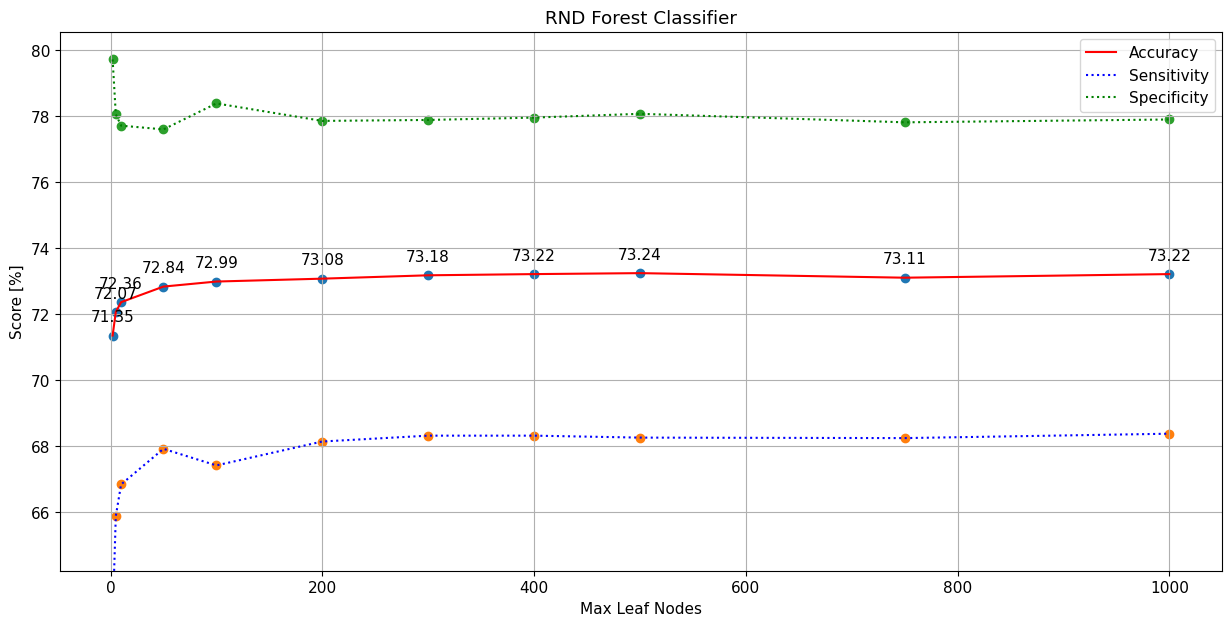

In [30]:
viewer_mode = True
rndF_classifiers = []
if viewer_mode:
  n_ests = [2,5,10,50,100,200,300,400,500,750,1000]
  for n_est in n_ests: # add append to dict like knn
    rndF_classifiers.append(RandomForestClassifier(n_estimators=500, max_depth=20, max_features='sqrt', max_leaf_nodes=n_est))

  acc_list = []
  tpr_list = []
  report_list = []
  true_positive = []
  true_negative = []

  for clf in rndF_classifiers: 
    clf.fit(X_train,y_train)

    y_predict = clf.predict(X_test)
    y_predicted = np.array(y_predict > 0.5, dtype=float)

    rndForest_acc = accuracy_score(y_test, y_predicted)
    cm = confusion_matrix(y_test, y_predicted)
    rndForest_tpr = cm[1][1] /(cm[1][0] + cm[1][1])
    rndForest_report = classification_report(y_test, y_predicted)

    acc_list.append(rndForest_acc)
    tpr_list.append(rndForest_tpr)
    report_list.append(rndForest_report)
    true_positive.append(cm[1][1])
    true_negative.append(cm[0][0])

  plt.figure(figsize=(15, 7))
  ax = ax
  score_list = np.array(acc_list)
  score_list_plot = score_list * 100
  true_positive_plot = np.array(true_positive)/sum(y_test) * 100
  true_negative_plot = np.array(true_negative)/(len(y_test)-sum(y_test)) * 100
  plt.plot(n_ests, score_list_plot,  'r-')
  plt.plot(n_ests, true_positive_plot, 'b:')
  plt.plot(n_ests, true_negative_plot, 'g:')
  plt.scatter(n_ests, score_list_plot)
  plt.scatter(n_ests, true_positive_plot)
  plt.scatter(n_ests, true_negative_plot)
  for x,y in zip(n_ests,score_list_plot):

      label = "{:.2f}".format(y)

      plt.annotate(str(round(y, 2)), # this is the text
                  (x,y), # these are the coordinates to position the label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center')

  plt.ylim(min(score_list_plot)* 0.9, max(score_list_plot)*1.1)
  plt.xlabel('Max Leaf Nodes')
  plt.ylabel('Score [%]')
  plt.title('RND Forest Classifier')
  plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])
  plt.grid(True)
  plt.show()

    

else:
  rndForestClassifier = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [500], 'max_features':['sqrt'], 'max_depth':[20], 'max_leaf_nodes':[500, 1000, 1500]}, cv=5, scoring=['accuracy','recall'], refit='accuracy').fit(X_train, y_train)
  print(rndForestClassifier.best_estimator_)
  param_selection = rndForestClassifier.cv_results_['params']
  test_scores = rndForestClassifier.cv_results_['mean_test_score']
  for i in param_selection:
    print(i)
  print(test_scores)

Number of leaf nodes is the most impactful parameter for the quality of the fit. The comparison between a subset of values shows a maximum at 300 leaf nodes for the test set accuracy.

Leaf Nodes = 500
Accuracy = 0.7324497524031459
Sensitivity (TPR) = 0.6825514281485866

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6975
           1       0.75      0.68      0.72      6757

    accuracy                           0.73     13732
   macro avg       0.73      0.73      0.73     13732
weighted avg       0.73      0.73      0.73     13732



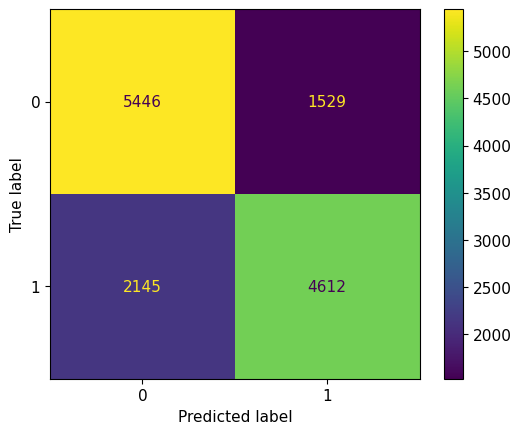

In [31]:
if viewer_mode:
  rndForest_acc = max(acc_list)
  max_index = np.argmax(acc_list)
  max_nest = n_ests[max_index]
  rndForest_tpr = tpr_list[max_index]
  rndForest_report = report_list[max_index]
  rndForestClassifier = rndF_classifiers[max_index]

  print('Leaf Nodes =', max_nest)
  print('Accuracy =', rndForest_acc)
  print('Sensitivity (TPR) =', rndForest_tpr)
  
  print('\n Confusion matrix \n \n')
  print(rndForest_report)

  ConfusionMatrixDisplay.from_estimator(rndForestClassifier, X_test, y_test)
  plt.show()
else:
  y_predict = rndForestClassifier.predict(X_test)
  y_predicted = np.array(y_predict > 0.5, dtype=float)

  rndForest_acc = accuracy_score(y_test, y_predicted)
  rndForest_report = classification_report(y_test, y_predicted)
  rndForest_cm = confusion_matrix(y_test, y_predicted)
  rndForest_tpr = rndForest_cm[1][1] /(rndForest_cm[1][0] + rndForest_cm[1][1])

  print('Accuracy =', rndForest_acc)
  print('Sensitivity (TPR) =', rndForest_tpr)
  
  print('\n Confusion matrix \n \n')
  print(rndForest_report)

  ConfusionMatrixDisplay.from_estimator(rndForestClassifier, X_test, y_test)
  plt.show()

# 3h - Support Vector Machine
Comparison of differet kernels (Linear, Radial Basis Function and Polynomial with a degree of 3)
Unfortuantely I dont have the computing power to compute this in a timely manner because with an 80/20 split with approx. 70000 examples will make a matrix with 250gb of ram to store which I dont have but a better way to do this would be to discard like 90% of my data and check performance that way. Below is the code I would use to run my SVM 

  C = 1.0  # SVM regularization parameter
  models = (svm.SVC(kernel='linear', C=C),
            svm.SVC(kernel='rbf', gamma=0.7, C=C),
            svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

  accuracy_svc = []
  for clf in models:  
      clf.fit(X_train_scaled, y_train_scaled)
      y_pred = clf.predict(X_test_scaled)
      accuracy_svc.append(accuracy_score(y_test_scaled, y_pred))
      print(f"Accuracy: ",  accuracy_score(y_test_scaled, y_pred))

  svc_clf_list = ['Linear', 'Radial Basis Function', 'Polynomial']

  max_accuracy_svc = max(accuracy_svc)
  max_svc_index = np.argmax(accuracy_svc)

  svc_clf = models[max_svc_index]
  svc_clf.fit(X_train_scaled, y_train_scaled)
  y_predict = svc_clf.predict(X_test_scaled)
  svc_report = classification_report(y_test, y_predict)

  cm_svc = confusion_matrix(y_test, y_predict)

  true_positive_svc = cm_svc[1][1]/sum(y_test)

  print('Accuracy =', max_accuracy_svc) 
  print('Sensitivity (TPR) =', true_positive_svc)
  print('Support Vector Classifier with highest accuracy:', svc_clf_list[max_svc_index]) 

  print('\n Confusion matrix \n \n')
  plot_confusion_matrix(svc_clf, X_test_scaled, y_test_scaled)
  plt.show()

# 4 Conclusion
The different classifiers still need to be compared in their prediction quality. The group chose to look at both accuracy and sensitivity (true positive Rate). Accuracy because predictions should be correct as often as possible. Sensitivity because not predicting disease is more dangerous for person's life than not predicting health.

The weight of sensitivity was chosen at 0.25 because it was intended to give an "all positive classifier" a considerably worse score than a classifier of around 3/4 accuracy

In [36]:
#collect results
tpr_weight = 0.25
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant analysis', 'Decision Tree', 
              'GradientBoostingClassifier', ' Nearest Neighbor', 'QDA', 'Random Forest'],
    'Accuracy': [logreg_acc, lda_acc, dtree_tuned_acc, boosting_acc, accuracy_KNN, qda_acc, rndForest_acc],
                    
    'Sensitivity' : [tpr_logreg,tpr_lda,tpr_dree_tuned,tpr_boost,true_positive_KNN, qda_tpr, rndForest_tpr],
    'Objective Value' : [logreg_acc + tpr_logreg*tpr_weight, lda_acc+tpr_lda*tpr_weight, dtree_tuned_acc+tpr_dree_tuned*tpr_weight,
                         boosting_acc+tpr_boost*tpr_weight, accuracy_KNN+true_positive_KNN*tpr_weight, 
                         qda_acc+qda_tpr*tpr_weight, rndForest_acc+rndForest_tpr*tpr_weight,
]})

models

,Model,Accuracy,Sensitivity,Objective Value
0,Logistic Regression,0.708345,0.707267,0.885162
1,Linear Discriminant analysis,0.722910,0.657096,0.887184
2,Decision Tree,0.729173,0.692467,0.902290
3,GradientBoostingClassifier,0.733542,0.684623,0.904698
4,Nearest Neighbor,0.642223,0.445168,0.753515
5,QDA,0.687518,0.562084,0.828039
6,Random Forest,0.732450,0.682551,0.903088


As can be seen in the table above, all classifiers lie between 65% and 75% for accuracy and perform a bit worse for sensitivity. The polynomial classifiers Decision Tree, Random Forest and Gradient Boosting Classifier performed slightly better in both regards than other classifiers but k-Nearest Neighbor didnt perform as well as the other 3 polynomial classifiers because I think the lack of data scaling within this project.

Features selected by forward sequential selection that determine which predictors have the highest indicator for CVD: ['age' 'ap_hi' 'ap_lo' 'cholesterol' 'alco' 'BMI']
Backward stepwise selection results in a higher accuracy and can be used as a more accurate predictor for highest CVD indicator but computer dosent have the memory for this process to run

The variance between the classifiers is higher in regard to sensitivity than to accuracy. All classifiers were worse at classifying sick people than healthy people. This difference is most pronounced in QDA KNN which may once again be due to the lack of data scaling within this project making these models more inaccurate. 

The difference in objective value between the better classifiers, Decision Tree, Gradient Boosting Classifier, and Random Forest is only marginal. These difference could very well be explained by the train/test split or the decisions taken in the data cleaning process and can not be clearly attributed to the superiority of one classifier.

# 5 - Refrences 

“Hypertensive Crisis: When You Should Call 911 for High Blood Pressure.” Www.Heart.Org, 31 May 2023, www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings/hypertensive-crisis-when-you-should-call-911-for-high-blood-pressure. 

Mays, Kimberly. “Are You Overweight or Obese? Learn with a BMI Chart.” DMEforLess, DMEforLess, 19 Aug. 2023, dmeforless.com/blogs/dmeforless/discover-your-weight-status-try-this-simple-bmi-calculator-to-determine-overweight-or-obesity. 

Weir, Connor B. “Home - Books - NCBI.” National Center for Biotechnology Information, U.S. National Library of Medicine, www.ncbi.nlm.nih.gov/books. Accessed 5 Dec. 2023. 